In [1]:
%run data_cleaning.py  # clean and save the data

import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import r2_score, mean_absolute_percentage_error

from weighted_adj_mat import get_weighted_adjacency_matrix
from preprocessing import get_spatial_conv_multiplier, get_normalized_node_features, split_dataset
from model import STGCN
from run_model import run_model

# set the features to be used as the model input
input_features = ['no2']#, 'pm10' 'pm25', 'so2', 'no2', 'o38h'

# Select the output feature as the index of the input_features list
output_feature_index = 0

num_timesteps_input = 21
num_timesteps_output = 3

epochs = 100
batch_size = 32

learning_rate = 1e-3

dropout_rate = 0.2


device = 'cpu'

torch.manual_seed(7) # for reproducibility

In [2]:
results, training_losses, validation_losses  = run_model(input_features, output_feature_index, num_timesteps_input, num_timesteps_output, dropout_rate, learning_rate, epochs, batch_size, device, verbose=True)


epochs:  0 Training loss: 0.7898212939500808 Validation loss: 0.8267980217933655
epochs:  10 Training loss: 0.4455415800213814 Validation loss: 0.5859168767929077
epochs:  20 Training loss: 0.43022040873765943 Validation loss: 0.6074343919754028
epochs:  30 Training loss: 0.4195339545607567 Validation loss: 0.5987454652786255
epochs:  40 Training loss: 0.4112186387181282 Validation loss: 0.5854547023773193
epochs:  50 Training loss: 0.41078214794397355 Validation loss: 0.5697237253189087
epochs:  60 Training loss: 0.40444386154413225 Validation loss: 0.6243401169776917
epochs:  70 Training loss: 0.408281609416008 Validation loss: 0.5921472907066345
epochs:  80 Training loss: 0.4031557083129883 Validation loss: 0.5543751120567322
epochs:  90 Training loss: 0.3992928028106689 Validation loss: 0.5303372144699097


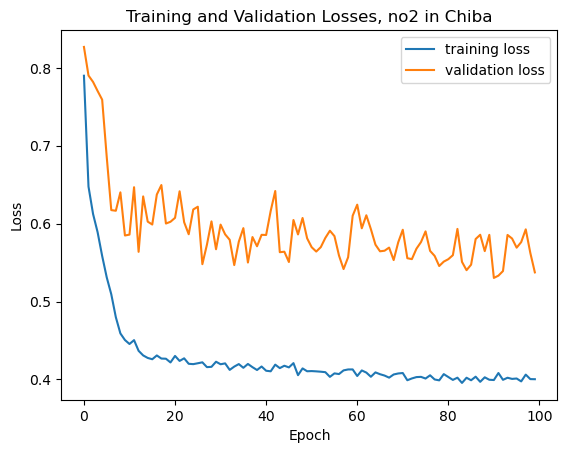

In [4]:
prefecture_index_example = 2
prefecture_name = results[prefecture_index_example]['prefecture_name']


plt.plot(training_losses, label="training loss")
plt.plot(validation_losses, label="validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Losses, "+input_features[output_feature_index] + " in " + prefecture_name)
plt.legend()
plt.show() # Dropout can make validation loss smaller than training loss

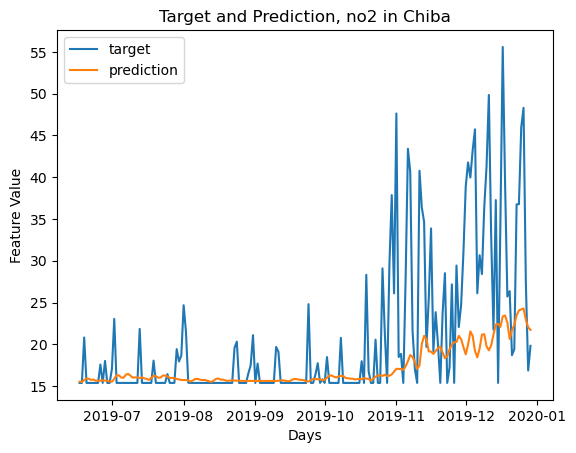

In [5]:
timestamps = results[prefecture_index_example]['timestamps']
targets = results[prefecture_index_example]['targets']
predictions = results[prefecture_index_example]['predictions']

plt.plot(timestamps,targets, label="target")
plt.plot(timestamps,predictions, label="prediction")
plt.xlabel("Days")
plt.ylabel("Feature Value")
plt.title("Target and Prediction, "+input_features[output_feature_index] + " in " + prefecture_name)
plt.legend()
plt.show() # 

0.1470769116813966 0.12415618850800503


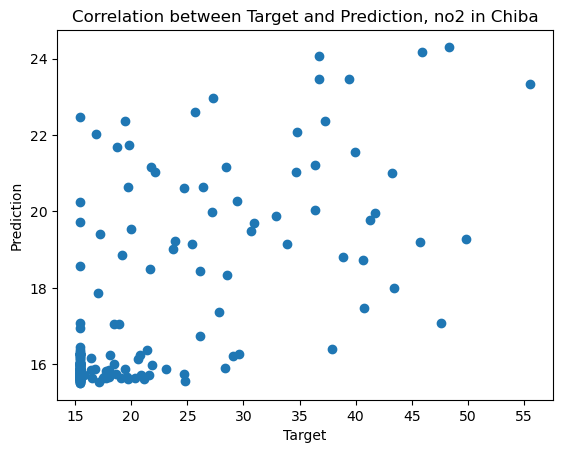

In [7]:
mape = mean_absolute_percentage_error(targets, predictions)
r2 = r2_score(targets, predictions)

print(mape, r2)

plt.scatter(targets, predictions)
plt.xlabel("Target")
plt.ylabel("Prediction")
plt.title("Correlation between Target and Prediction, "+input_features[output_feature_index] + " in " + prefecture_name)
plt.show() # 